# Homework 7 - Product Recommendation
**Subject:** BADS 7105 - CRM Analytics and Intelligence

**Student:** Pawarut Kongratana (6210422006)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Preparation

In [2]:
df = pd.read_csv('Customer Survey.csv')

df.head(3)

,Unnamed: 0,ประทับเวลา,Mountain bike,Collagen,Green Brownie,Mae Kong,Botox,Weed,Hemp,Blood Pressure,...,light mango,autonomous cat WC,Chanel Bag,Khaki Food,Tangchao,Healthy pillow,clean food for cat,Dido Orange juice,Authentic Software,UV protector creams
0,20/3/2021,11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,20/3/2021,11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,20/3/2021,11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [3]:
df = df.iloc[:, 3:]
df.dropna(inplace=True)
df.replace({'เคย':1, 'ไม่เคย':0}, inplace=True)

df.head(3)

,Collagen,Green Brownie,Mae Kong,Botox,Weed,Hemp,Blood Pressure,Color Light Bulb,Bikini Wax,E Chair,...,light mango,autonomous cat WC,Chanel Bag,Khaki Food,Tangchao,Healthy pillow,clean food for cat,Dido Orange juice,Authentic Software,UV protector creams
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,1
2,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,1,1


# Exploratory Data Analysis

In [4]:
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Bags,39.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Shabu,39.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
UV protector creams,39.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Rotee,39.0,0.974359,0.160128,0.0,1.0,1.0,1.0,1.0
Pie,39.0,0.948718,0.223456,0.0,1.0,1.0,1.0,1.0
Cashew Nut,39.0,0.897436,0.307355,0.0,1.0,1.0,1.0,1.0
Side Pillow,39.0,0.871795,0.338688,0.0,1.0,1.0,1.0,1.0
Fan,39.0,0.820513,0.388776,0.0,1.0,1.0,1.0,1.0
Authentic Software,39.0,0.794872,0.409074,0.0,1.0,1.0,1.0,1.0
Sun Pork,39.0,0.794872,0.409074,0.0,1.0,1.0,1.0,1.0


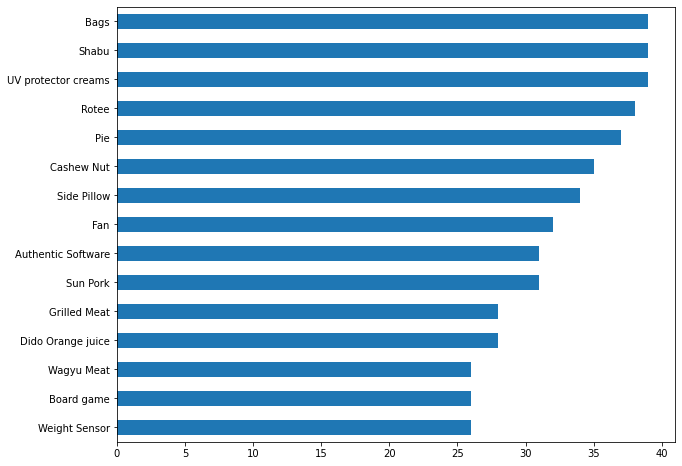

In [7]:
plt.figure(figsize=(10, 8))
df.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis()

# Market Basket Analysis

In [8]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.538462,(Collagen)
1,0.666667,(Decor Plant)
2,0.871795,(Side Pillow)
3,0.666667,(Weight Sensor)
4,0.948718,(Pie)
5,0.641026,(Lego)
6,0.820513,(Fan)
7,0.615385,(Dumbell)
8,0.538462,(Vaccume Robot)
9,0.666667,(Wagyu Meat)


In [9]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
140758,"(UV protector creams, Sun Pork, Rotee, Grilled...","(Wagyu Meat, Cashew Nut, Side Pillow)",0.615385,0.564103,0.512821,0.833333,1.477273,0.16568,2.615385
140503,"(Shabu, UV protector creams, Sun Pork, Grilled...","(Wagyu Meat, Cashew Nut, Side Pillow)",0.615385,0.564103,0.512821,0.833333,1.477273,0.16568,2.615385
196393,"(Wagyu Meat, Bags, Cashew Nut, Side Pillow)","(Shabu, UV protector creams, Sun Pork, Grilled...",0.564103,0.615385,0.512821,0.909091,1.477273,0.16568,4.230769
196397,"(Shabu, Wagyu Meat, Cashew Nut, Side Pillow)","(UV protector creams, Sun Pork, Bags, Grilled ...",0.564103,0.615385,0.512821,0.909091,1.477273,0.16568,4.230769
74564,"(UV protector creams, Wagyu Meat, Cashew Nut, ...","(Sun Pork, Grilled Meat)",0.564103,0.615385,0.512821,0.909091,1.477273,0.16568,4.230769
196403,"(UV protector creams, Sun Pork, Grilled Meat)","(Bags, Shabu, Wagyu Meat, Side Pillow, Cashew ...",0.615385,0.564103,0.512821,0.833333,1.477273,0.16568,2.615385
140401,"(Shabu, Wagyu Meat, Cashew Nut, Side Pillow)","(Sun Pork, Rotee, Grilled Meat)",0.564103,0.615385,0.512821,0.909091,1.477273,0.16568,4.230769
140408,"(Wagyu Meat, Rotee, Cashew Nut, Side Pillow)","(Shabu, Sun Pork, Grilled Meat)",0.564103,0.615385,0.512821,0.909091,1.477273,0.16568,4.230769
140413,"(Shabu, Sun Pork, Grilled Meat)","(Wagyu Meat, Rotee, Cashew Nut, Side Pillow)",0.615385,0.564103,0.512821,0.833333,1.477273,0.16568,2.615385
140420,"(Sun Pork, Rotee, Grilled Meat)","(Shabu, Wagyu Meat, Cashew Nut, Side Pillow)",0.615385,0.564103,0.512821,0.833333,1.477273,0.16568,2.615385


# Visualization

In [10]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] >= 1.05) & (rules['confidence'] >= 0.5)]
simple_rules.loc[:, 'antecedents'] = simple_rules.loc[:, 'antecedents'].apply(lambda x: list(x)[0]).astype('unicode')
simple_rules.loc[:, 'consequents'] = simple_rules.loc[:, 'consequents'].apply(lambda x: list(x)[0]).astype('unicode')
simple_rules.loc[:, 'lift'] = simple_rules.loc[:, 'lift'].round(3)
simple_rules.sort_values('lift', ascending=False).head(10)

c:\users\pawarutk\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
155,Grilled Meat,Wagyu Meat,0.717949,0.666667,0.641026,0.892857,1.339,0.162393,3.111111
154,Wagyu Meat,Grilled Meat,0.666667,0.717949,0.641026,0.961538,1.339,0.162393,7.333333
14,Decor Plant,Lego,0.666667,0.641026,0.538462,0.807692,1.260,0.111111,1.866667
15,Lego,Decor Plant,0.641026,0.666667,0.538462,0.840000,1.260,0.111111,2.083333
67,Weight Sensor,Board game,0.666667,0.666667,0.512821,0.769231,1.154,0.068376,1.444444
66,Board game,Weight Sensor,0.666667,0.666667,0.512821,0.769231,1.154,0.068376,1.444444
20,Decor Plant,Grilled Meat,0.666667,0.717949,0.538462,0.807692,1.125,0.059829,1.466667
21,Grilled Meat,Decor Plant,0.717949,0.666667,0.538462,0.750000,1.125,0.059829,1.333333
97,Lego,Grilled Meat,0.641026,0.717949,0.512821,0.800000,1.114,0.052597,1.410256
96,Grilled Meat,Lego,0.717949,0.641026,0.512821,0.714286,1.114,0.052597,1.256410


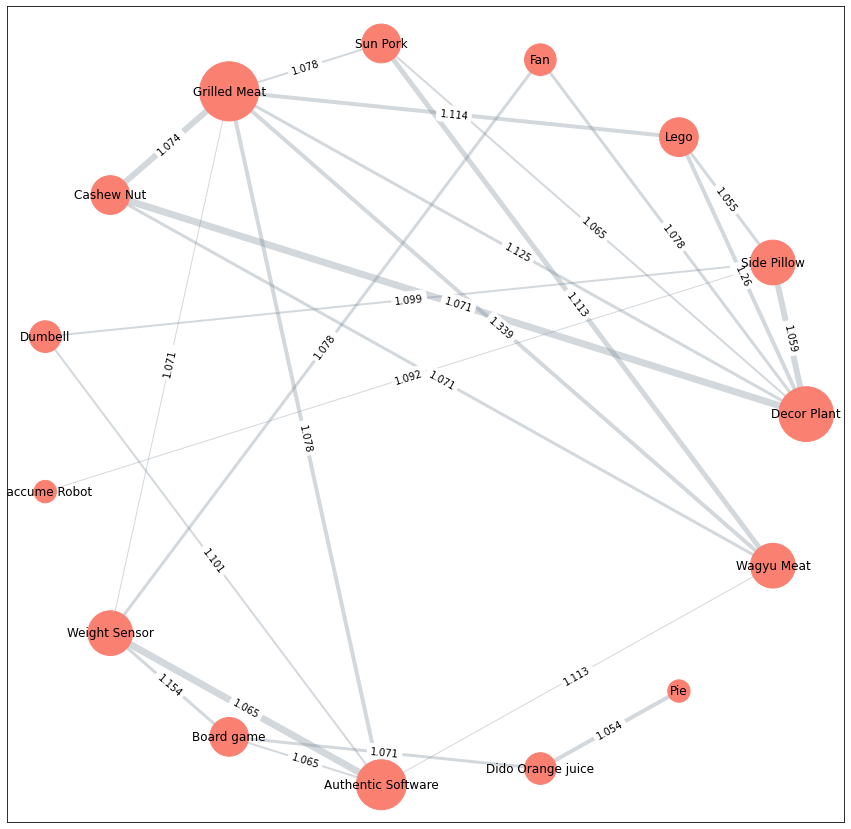

In [11]:
plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(simple_rules, source='antecedents', target='consequents', edge_attr='lift')
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=dict(G.degree).keys(), node_size=[s*500 for s in dict(G.degree).values()], node_color='salmon')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=[w for w in dict(G.degree).values()], edge_color='slategray')
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'lift'))

plt.show()